# FBRESNET - one example

In [1]:
# Import Packages
import numpy as np
from torch.autograd import Variable
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

In [3]:
# Import local model files
from FBRN.myfunc import Physics
from FBRN.myfunc import MyMatmul
from FBRN.main import FBRestNet
from FBRN.model import MyModel
from FBRN.myfunc import Export_hyper

### Initialisation
The condition are as follows:
$a=1$ ,
$p=1$ ,
the constraint is $0 <x_i <1$ .

In [4]:
exp1 = FBRestNet(experimentation=Physics(2000,50,1,1), nb_blocks=20, noise = 0.05,folder = './', im_set="Set1",batch_size=[100,1],lr=1e-3, nb_epochs=[20,1])

### Dataset
Here, the dataset is of size 300, which is split in 200 trainig datas and 100 validation datas.

In [5]:
train_set, val_set = exp1.CreateDataSet()

c:\Users\ezece\OneDrive\Documents\Inria-OPIS\repos\FBResNet\FBRN\main.py:235: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:204.)
  x_tensor = torch.FloatTensor(liste_l_trsf) # signal in cos/eig basis


### Trainings
The training is done over 20 epochs, learning rate is $10^{-3}$.
The Lipschitz constant is plot duroing training.
Here the parameter can be saved after training in file 'Trainings', and uploaded later.

epoch :  0  -----  validation :  0.000138628
    ----- initial error :  0.000863287
epoch :  1  -----  validation :  0.000135264
    ----- initial error :  0.000863287
epoch :  2  -----  validation :  0.000132569
    ----- initial error :  0.000863287
epoch :  3  -----  validation :  0.00012929
    ----- initial error :  0.000863287
epoch :  4  -----  validation :  0.000125952
    ----- initial error :  0.000863287
epoch :  5  -----  validation :  0.000123172
    ----- initial error :  0.000863287
epoch :  6  -----  validation :  0.000120493
    ----- initial error :  0.000863287
epoch :  7  -----  validation :  0.000118186
    ----- initial error :  0.000863287
epoch :  8  -----  validation :  0.000115921
    ----- initial error :  0.000863287
epoch :  9  -----  validation :  0.000113719
    ----- initial error :  0.000863287
epoch :  10  -----  validation :  0.000111719
    ----- initial error :  0.000863287
epoch :  11  -----  validation :  0.000109958
    ----- initial error :  0.0

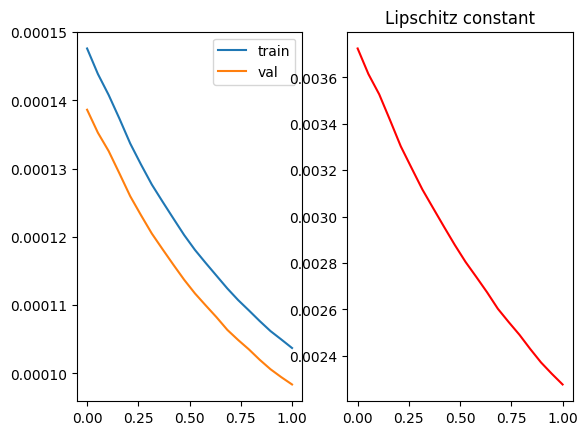

Final Lipschitz constant =  0.002276710597923438


In [10]:
exp1.train(train_set,val_set,save_model=False)

### Testing
We computre the averaged error over the testing set, and compute one example, on the left the signal are projected on the eigenbasis of operator $T_a^TT_a$, on the right on the finite element basis.

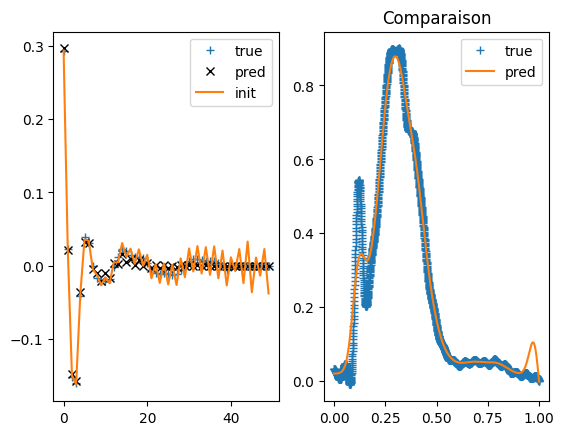

Erreur de sortie :  0.015035981387083997
Erreur initiale :  0.11023477219658419


In [11]:
average_error = exp1.test(val_set)

### Test on a Gaussian function

<class 'str'>
|x-xp|/|x| = 0.1996416659283845


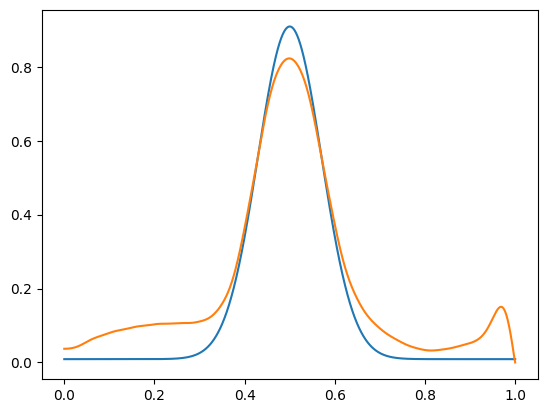

In [12]:
exp1.test_gauss(noise=0.05)

### Lipschitz constant

Here we implement for the Gaussian signal the lipschitz constant of the neural network, depending on the input. s or if 

$x_{in}=x_{bias}=T_a^T y^\delta$ 

In [13]:
exp1.model.Lipschitz(opt1="semi",opt2="entree11")

0.04963355501801235

$x_{in}= 0$, and $x_{bias}= T_a^T y^\delta$ 

In [14]:
exp1.model.Lipschitz(opt1="semi",opt2="entree01")

0.002275202869460091